Lab 2: More 311 Data exploration

In HW1, we did some basic data exploration and visualization. In this lab, we will continue digging through the 311 datasets for more data wrangling practice.
Git and Github

Before we get started, let's get set up with git and github on our computers https://github.com/dssg/hitchhikers-guide/tree/master/curriculum/git-and-github/basic_git_tutorial is a good tutorial that you should go through if you're not comfortable with git and github. Make sure you set up an ssh key and add it to your github account to make it easy to push changes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download Datases
sanitation_df = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv')#parse_dates=[]

In [3]:
sanitation_df.shape

(4208, 16)

In [5]:
sanitation_df.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What is the Nature of this Code Violation?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location
0,01/02/2017,Completed,01/03/2017,17-00012728,Sanitation Code Violation,Garbage in alley,6156 S KARLOV AVE,60629,1150093.172478,1863460.083272,23,8,65,41.781238,-87.725275,"(41.78123782345127, -87.72527525417806)"
1,01/02/2017,Completed,01/03/2017,17-00015443,Sanitation Code Violation,Overflowing carts,2433 N ASHLAND AVE,60614,1165256.823287,1916370.180079,32,19,7,41.926120,-87.668179,"(41.926120388059594, -87.66817909285737)"
2,01/02/2017,Completed,01/03/2017,17-00017008,Sanitation Code Violation,Dumpster not being emptied,4400 S DREXEL BLVD,60653,1182932.251886,1876025.249995,4,2,39,41.815017,-87.604490,"(41.81501736681795, -87.60448996218275)"
3,01/02/2017,Completed,01/03/2017,17-00019975,Sanitation Code Violation,Other,445 N RIDGEWAY AVE,60624,1151308.789889,1902733.029969,27,11,23,41.888984,-87.719790,"(41.88898421978483, -87.71979005105871)"
4,01/02/2017,Completed,01/03/2017,17-00023515,Sanitation Code Violation,Garbage in yard,4240 N KEELER AVE,60641,1147643.184285,1927851.436999,39,17,16,41.957983,-87.732605,"(41.95798262337295, -87.73260547955365)"


Spatiotemporal data

A lot of policy problems involve data related to some location (house, business, block, zipcode, city, etc.) at some time. It is useful to know how to do analysis on spatiotemporal data. The analysis below will help you get more comfortable with analyzing data with spatial and temporal components
Completion Times

A natural thing to ask about 311 requests is how long does it take 311 requests to be completed? Do response times vary much between the different 311 request types? Plot the distribution of response times by each request type.


In [6]:
from datetime import datetime
from dateutil import relativedelta

def time_lapsed(start_date, end_date):
    '''
    Given an start and end date, calculate the number of days betweent the two. 
    
    Inputs:
        start_date - string, date must be in Month/Day/Year format
        end_date - string, format same as start_date
        
    Output:
        difference.days - number of days between the two dates. 
    '''
    date1 = datetime.strptime(start_date, '%m/%d/%Y')
    date2 = datetime.strptime(end_date, '%m/%d/%Y')
    difference = date2 - date1
    return difference.days

In [7]:
def time_lapsed_col(df):
    '''
    Given a data frame with a column for Creation Date and one for Completion Date, create a new column with 
    the number of days between each of the days. 
    
    Input:
        df - dataframe
    Output:
        same data frame but with new column. 
    '''
    for i, row in df.iterrows():
        creation_date = row['Creation Date']
        completion_date = row['Completion Date']
        if type(creation_date) == str and type(completion_date) == str:
            tl = time_lapsed(creation_date, completion_date)
            df.loc[i, 'Time_Lapsed'] = tl
        else:
            df.loc[i, 'Time_Lapsed'] = np.NaN
    
    return df

In [8]:
sanitation_df = time_lapsed_col(sanitation_df)

In [13]:
sanitation_df.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Service Request Number',
       'Type of Service Request', 'What is the Nature of this Code Violation?',
       'Street Address', 'ZIP Code', 'X Coordinate', 'Y Coordinate', 'Ward',
       'Police District', 'Community Area', 'Latitude', 'Longitude',
       'Location', 'Time_Lapsed'],
      dtype='object')

In [37]:
sanitation_df.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,What is the Nature of this Code Violation?,Street Address,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Location,Time_Lapsed
0,01/02/2017,Completed,01/03/2017,17-00012728,Sanitation Code Violation,Garbage in alley,6156 S KARLOV AVE,60629,1150093.172478,1863460.083272,23,8,65,41.781238,-87.725275,"(41.78123782345127, -87.72527525417806)",1
1,01/02/2017,Completed,01/03/2017,17-00015443,Sanitation Code Violation,Overflowing carts,2433 N ASHLAND AVE,60614,1165256.823287,1916370.180079,32,19,7,41.926120,-87.668179,"(41.926120388059594, -87.66817909285737)",1
2,01/02/2017,Completed,01/03/2017,17-00017008,Sanitation Code Violation,Dumpster not being emptied,4400 S DREXEL BLVD,60653,1182932.251886,1876025.249995,4,2,39,41.815017,-87.604490,"(41.81501736681795, -87.60448996218275)",1
3,01/02/2017,Completed,01/03/2017,17-00019975,Sanitation Code Violation,Other,445 N RIDGEWAY AVE,60624,1151308.789889,1902733.029969,27,11,23,41.888984,-87.719790,"(41.88898421978483, -87.71979005105871)",1
4,01/02/2017,Completed,01/03/2017,17-00023515,Sanitation Code Violation,Garbage in yard,4240 N KEELER AVE,60641,1147643.184285,1927851.436999,39,17,16,41.957983,-87.732605,"(41.95798262337295, -87.73260547955365)",1


<function matplotlib.pyplot.title>

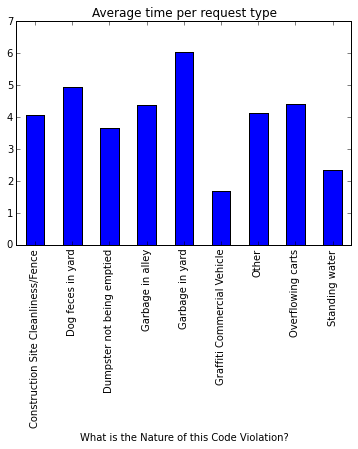

In [24]:
# Plotting average response time per request type
sanitation_df.groupby('What is the Nature of this Code Violation?')['Time_Lapsed'].mean().plot('bar', title = 'Average time per request type')
plt.title


Adding Time based features

Extract the hour of day, day of week, month of year from the 311 request dates. The pandas to_datetime function may be helpful for this. Do the 311 request frequencies look the same by day of week/month of year? Do 311 requests filed on weekends take longer to complete than those filed on weekdays? Perform the same analysis for each different request type as well. Report any interesting/surprising findings.


In [47]:
x = pd.to_datetime('11/2/2102 03:1:212')
y = pd.to_datetime('12/3/2102 01:23:12')
x.day

2

In [50]:
def time_stamp_col(Creation_Date):
    '''
    Extract the hour of day, day of the week, month of year from the request 311 dates.
    '''
    stamp = pd.to_datetime(Creation_Date)
    hour_of_day = stamp.hour
    day_of_week = stamp.day
    month = stamp.month
    return hour_of_day, day_of_week, month

In [51]:
y = time_stamp_col('11/2/2102')

In [52]:
y

(0, 2, 11)

In [54]:
for i, row in sanitation_df.iterrows():
    creation_date = row['Creation Date']
    if type(creation_date) == str:
        hour, day, month = time_stamp_col(creation_date)
        sanitation_df.loc[i, 'hour'] = hour
        sanitation_df.loc[i, 'day'] = day
        sanitation_df.loc[i, 'month'] = month
    else:
        sanitation_df.loc[i, 'hour'] = np.NaN
        sanitation_df.loc[i, 'day'] = np.NaN
        sanitation_df.loc[i, 'month'] = np.NaN

In [58]:
sanitation_df.describe()

,ZIP Code,X Coordinate,Y Coordinate,Ward,Police District,Community Area,Latitude,Longitude,Time_Lapsed,hour,day,month
count,4206.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,3965.000000,4208,4208.000000,4208.000000
mean,60630.061341,1162149.521317,1891059.816995,24.449144,12.702234,35.049192,41.856719,-87.680343,4.589155,0,15.538973,2.152329
std,15.573463,14866.511070,31455.982283,13.377988,6.712683,22.193237,0.086490,0.054076,5.374655,0,8.920770,0.894129
min,60601.000000,1116983.959980,1815671.478500,1.000000,1.000000,1.000000,41.648993,-87.845203,0.000000,0,1.000000,1.000000
25%,60618.000000,1151551.647256,1862316.522418,14.000000,8.000000,18.750000,41.777739,-87.718840,1.000000,0,8.000000,1.000000
50%,60628.000000,1161335.100113,1898210.454968,25.000000,12.000000,28.000000,41.876702,-87.682719,3.000000,0,16.000000,2.000000
75%,60641.000000,1171830.938804,1916889.770226,34.000000,18.000000,57.000000,41.927544,-87.645397,6.000000,0,23.000000,3.000000
max,60827.000000,1205115.529997,1951398.677893,50.000000,25.000000,77.000000,42.022249,-87.524558,41.000000,0,31.000000,4.000000


In [78]:
counts = sanitation_df.groupby('What is the Nature of this Code Violation?')['day'].value_counts()#.iteritems():

    #.plot('bar')


In [84]:
d = {}
for ctype, count in counts.iteritems():
    req_type = ctype[0]
    day = ctype[1]

('Construction Site Cleanliness/Fence', 12.0)
17
('Construction Site Cleanliness/Fence', 20.0)
17
('Construction Site Cleanliness/Fence', 17.0)
13
('Construction Site Cleanliness/Fence', 8.0)
13
('Construction Site Cleanliness/Fence', 24.0)
13
('Construction Site Cleanliness/Fence', 28.0)
12
('Construction Site Cleanliness/Fence', 27.0)
12
('Construction Site Cleanliness/Fence', 6.0)
11
('Construction Site Cleanliness/Fence', 10.0)
11
('Construction Site Cleanliness/Fence', 13.0)
10
('Construction Site Cleanliness/Fence', 31.0)
9
('Construction Site Cleanliness/Fence', 9.0)
9
('Construction Site Cleanliness/Fence', 14.0)
9
('Construction Site Cleanliness/Fence', 15.0)
9
('Construction Site Cleanliness/Fence', 22.0)
9
('Construction Site Cleanliness/Fence', 21.0)
8
('Construction Site Cleanliness/Fence', 19.0)
7
('Construction Site Cleanliness/Fence', 11.0)
7
('Construction Site Cleanliness/Fence', 23.0)
7
('Construction Site Cleanliness/Fence', 1.0)
7
('Construction Site Cleanliness/Fe